In [59]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
!unzip /content/RATEGAIN.zip -d /content/RATEGAIN_folder

Archive:  /content/RATEGAIN.zip
replace /content/RATEGAIN_folder/RATEGAIN/Skyexpress_OW_AllYear_EUR_M13172461_Raw data_16-May-2023.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [61]:
import zipfile
import os

# Directory containing the zip files
zip_dir = '/content/RATEGAIN_folder/RATEGAIN'
# Directory where you want to extract the files
extract_dir = '/content/RATEGAIN_folder/extracted'

os.makedirs(extract_dir, exist_ok=True)

for file in os.listdir(zip_dir):
    if file.endswith('.zip'):
        with zipfile.ZipFile(os.path.join(zip_dir, file), 'r') as zip_ref:
            zip_ref.extractall(extract_dir)


In [62]:
import os
import pandas as pd
import re
folder_path = '/content/RATEGAIN_folder/extracted'

def merge_csv_in_folder(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    print(csv_files)
    dataframes = []

    # Regular expression pattern to extract the date from filename
    pattern = r'(\d{2}-[a-zA-Z]{3}-\d{4})'

    for csv_file in csv_files:
        # Extracting the date from the filename using regex
        match = re.search(pattern, csv_file)
        if match:
          booking_date = match.group(1)
          df_temp = pd.read_csv(os.path.join(folder_path, csv_file))
          df_temp['booking date'] = booking_date
          dataframes.append(df_temp)

    merged_df = pd.concat(dataframes, axis=0, ignore_index=True)

    return merged_df

df = merge_csv_in_folder(folder_path)
print("CSV files have been merged into a DataFrame named df.")


['Skyexpress_OW_AllYear_EUR_M3244780_Raw data_11-Aug-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3230130_Raw data_27-Jul-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3243667_Raw data_10-Aug-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3197647_Raw data_16-Jun-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3225598_Raw data_22-Jul-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3246327_Raw data_13-Aug-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3187835_Raw data_03-Jun-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3169258_Raw data_13-May-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3247099_Raw data_14-Aug-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3209862_Raw data_02-Jul-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3234560_Raw data_01-Aug-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3222633_Raw data_19-Jul-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3223647_Raw data_20-Jul-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3215473_Raw data_10-Jul-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3184152_Raw data_29-May-2023.csv', 'Skyexpress_OW_AllYear_EUR_M3236589_Raw data_03-Aug-20

<ipython-input-62-ecce6facf4d2>:19: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(os.path.join(folder_path, csv_file))


CSV files have been merged into a DataFrame named df.


In [63]:
display(df)

,SiteCode,SiteName,DepartureDate,ReturnDate,SourceAirport,DestinationAirport,StopOversCityOutbound,StopOversCityInbound,Currency,Status,...,Outbound_FBC,Inbound_FBC,Outbound_BookingClass,Inbound_BookingClass,Outbound_OperatingCXR,Inbound_OperatingCXR,Outbound_Route,Inbound_Route,Message,booking date
0,SSFR-FR,SkyScannerAPIFR,08/11/2023,NaN,ATH,HER,NaN,NaN,EUR,Available,...,NaN,NaN,NaN,NaN,Aegean Airlines,NaN,23:25 - ATH :: 00:15 - HER,NaN,NaN,11-Aug-2023
1,SSFR-FR,SkyScannerAPIFR,08/11/2023,NaN,ATH,HER,NaN,NaN,EUR,Available,...,GEGROUP,NaN,G,NaN,Aegean Airlines,NaN,23:25 - ATH :: 00:15 - HER,NaN,NaN,11-Aug-2023
2,SSFR-FR,SkyScannerAPIFR,08/11/2023,NaN,ATH,HER,NaN,NaN,EUR,Available,...,GEGROUP,NaN,G,NaN,Aegean Airlines,NaN,21:25 - ATH :: 22:15 - HER,NaN,NaN,11-Aug-2023
3,A3-AU,AegeanAirways_Y,08/11/2023,NaN,ATH,HER,NaN,NaN,EUR,Available,...,NaN,NaN,NaN,NaN,NaN,NaN,23:25 - ATH :: 00:15 - HER,NaN,NaN,11-Aug-2023
4,SKY-GR,SkyExpressAPI,08/11/2023,NaN,ATH,HER,NaN,NaN,EUR,Close,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No record found for requested parameters...,11-Aug-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254597,SSFR-FR,SkyScannerAPIFR,09/20/2023,NaN,SKG,ATH,NaN,NaN,EUR,Available,...,NaN,NaN,NaN,NaN,Aegean Airlines,NaN,13:05 - SKG :: 14:00 - ATH,NaN,NaN,23-May-2023
1254598,SSFR-FR,SkyScannerAPIFR,09/20/2023,NaN,SKG,ATH,NaN,NaN,EUR,Available,...,SNLGTDD,NaN,S,NaN,Aegean Airlines,NaN,18:00 - SKG :: 18:55 - ATH,NaN,NaN,23-May-2023
1254599,SSFR-FR,SkyScannerAPIFR,09/20/2023,NaN,SKG,ATH,NaN,NaN,EUR,Available,...,SNLGTDD,NaN,S,NaN,Aegean Airlines,NaN,19:45 - SKG :: 20:40 - ATH,NaN,NaN,23-May-2023
1254600,SSFR-FR,SkyScannerAPIFR,09/20/2023,NaN,SKG,ATH,NaN,NaN,EUR,Available,...,SNLGTDD,NaN,S,NaN,Aegean Airlines,NaN,09:10 - SKG :: 10:05 - ATH,NaN,NaN,23-May-2023


In [64]:
df.columns

Index(['SiteCode', 'SiteName', 'DepartureDate', 'ReturnDate', 'SourceAirport',
       'DestinationAirport', 'StopOversCityOutbound', 'StopOversCityInbound',
       'Currency', 'Status', 'BaseFare', 'Taxes', 'GrossFare', 'CabinClass',
       'Outbound_Class', 'Inbound_Class', 'Outbound_Airline_Code',
       'Inbound_Airline_Code', 'Outbound_Stop', 'Inbound_Stop',
       'Outbound_Flight', 'Inbound_Flight', 'Outbound_Departuretime',
       'Inbound_Departuretime', 'Outbound_Duration', 'Inbound_Duration',
       'Outbound_ArrivalTime', 'Inbound_ArrivalTime', 'Outbound_FBC',
       'Inbound_FBC', 'Outbound_BookingClass', 'Inbound_BookingClass',
       'Outbound_OperatingCXR', 'Inbound_OperatingCXR', 'Outbound_Route',
       'Inbound_Route', 'Message', 'booking date'],
      dtype='object')

In [65]:
df['CabinClass'].unique()

array(['E'], dtype=object)

In [92]:

# Regular expression to capture the times
# It captures groups of two digits, separated by a colon, which represent the time format
time_regex = r'(\d{2}:\d{2}) - \w{3} :: (\d{2}:\d{2}) - \w{3}'

# Extract departure and arrival times using the regular expression
df[['Departure_Time', 'Arrival_Time']] = df['Outbound_Route'].str.extract(time_regex)

display(df)

,SiteCode,SiteName,DepartureDate,ReturnDate,SourceAirport,DestinationAirport,StopOversCityOutbound,StopOversCityInbound,Currency,Status,...,Outbound_BookingClass,Inbound_BookingClass,Outbound_OperatingCXR,Inbound_OperatingCXR,Outbound_Route,Inbound_Route,Message,booking date,Departure_Time,Arrival_Time
0,SSFR-FR,SkyScannerAPIFR,2023-08-11,NaN,ATH,HER,NaN,NaN,EUR,Available,...,NaN,NaN,Aegean Airlines,NaN,23:25 - ATH :: 00:15 - HER,NaN,NaN,11-Aug-2023,23:25,00:15
1,SSFR-FR,SkyScannerAPIFR,2023-08-11,NaN,ATH,HER,NaN,NaN,EUR,Available,...,G,NaN,Aegean Airlines,NaN,23:25 - ATH :: 00:15 - HER,NaN,NaN,11-Aug-2023,23:25,00:15
2,SSFR-FR,SkyScannerAPIFR,2023-08-11,NaN,ATH,HER,NaN,NaN,EUR,Available,...,G,NaN,Aegean Airlines,NaN,21:25 - ATH :: 22:15 - HER,NaN,NaN,11-Aug-2023,21:25,22:15
3,A3-AU,AegeanAirways_Y,2023-08-11,NaN,ATH,HER,NaN,NaN,EUR,Available,...,NaN,NaN,NaN,NaN,23:25 - ATH :: 00:15 - HER,NaN,NaN,11-Aug-2023,23:25,00:15
4,SKY-GR,SkyExpressAPI,2023-08-11,NaN,ATH,HER,NaN,NaN,EUR,Close,...,NaN,NaN,NaN,NaN,NaN,NaN,No record found for requested parameters...,11-Aug-2023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254597,SSFR-FR,SkyScannerAPIFR,2023-09-20,NaN,SKG,ATH,NaN,NaN,EUR,Available,...,NaN,NaN,Aegean Airlines,NaN,13:05 - SKG :: 14:00 - ATH,NaN,NaN,23-May-2023,13:05,14:00
1254598,SSFR-FR,SkyScannerAPIFR,2023-09-20,NaN,SKG,ATH,NaN,NaN,EUR,Available,...,S,NaN,Aegean Airlines,NaN,18:00 - SKG :: 18:55 - ATH,NaN,NaN,23-May-2023,18:00,18:55
1254599,SSFR-FR,SkyScannerAPIFR,2023-09-20,NaN,SKG,ATH,NaN,NaN,EUR,Available,...,S,NaN,Aegean Airlines,NaN,19:45 - SKG :: 20:40 - ATH,NaN,NaN,23-May-2023,19:45,20:40
1254600,SSFR-FR,SkyScannerAPIFR,2023-09-20,NaN,SKG,ATH,NaN,NaN,EUR,Available,...,S,NaN,Aegean Airlines,NaN,09:10 - SKG :: 10:05 - ATH,NaN,NaN,23-May-2023,09:10,10:05


In [93]:
df_fare = df[['SiteName','DepartureDate','SourceAirport','DestinationAirport','booking date','GrossFare','Departure_Time','Arrival_Time']]
df_fare


,SiteName,DepartureDate,SourceAirport,DestinationAirport,booking date,GrossFare,Departure_Time,Arrival_Time
0,SkyScannerAPIFR,2023-08-11,ATH,HER,11-Aug-2023,256.99,23:25,00:15
1,SkyScannerAPIFR,2023-08-11,ATH,HER,11-Aug-2023,1068.00,23:25,00:15
2,SkyScannerAPIFR,2023-08-11,ATH,HER,11-Aug-2023,1068.00,21:25,22:15
3,AegeanAirways_Y,2023-08-11,ATH,HER,11-Aug-2023,228.57,23:25,00:15
4,SkyExpressAPI,2023-08-11,ATH,HER,11-Aug-2023,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1254597,SkyScannerAPIFR,2023-09-20,SKG,ATH,23-May-2023,46.99,13:05,14:00
1254598,SkyScannerAPIFR,2023-09-20,SKG,ATH,23-May-2023,52.51,18:00,18:55
1254599,SkyScannerAPIFR,2023-09-20,SKG,ATH,23-May-2023,52.51,19:45,20:40
1254600,SkyScannerAPIFR,2023-09-20,SKG,ATH,23-May-2023,52.51,09:10,10:05


In [94]:
df_fare.columns

Index(['SiteName', 'DepartureDate', 'SourceAirport', 'DestinationAirport',
       'booking date', 'GrossFare', 'Departure_Time', 'Arrival_Time'],
      dtype='object')

In [95]:
import pandas as pd


# Convert 'DepartureDate' and 'booking date' columns to datetime
df_fare['DepartureDate'] = pd.to_datetime(df_fare['DepartureDate'], format='%m/%d/%Y')
df_fare['booking date'] = pd.to_datetime(df_fare['booking date'], format='%d-%b-%Y')


# Compute the difference to get 'days left'
df_fare['days left'] = (df_fare['DepartureDate'] - df_fare['booking date']).dt.days

display(df_fare)



<ipython-input-95-f92a4004f7f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare['DepartureDate'] = pd.to_datetime(df_fare['DepartureDate'], format='%m/%d/%Y')
<ipython-input-95-f92a4004f7f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare['booking date'] = pd.to_datetime(df_fare['booking date'], format='%d-%b-%Y')
<ipython-input-95-f92a4004f7f6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,SiteName,DepartureDate,SourceAirport,DestinationAirport,booking date,GrossFare,Departure_Time,Arrival_Time,days left
0,SkyScannerAPIFR,2023-08-11,ATH,HER,2023-08-11,256.99,23:25,00:15,0
1,SkyScannerAPIFR,2023-08-11,ATH,HER,2023-08-11,1068.00,23:25,00:15,0
2,SkyScannerAPIFR,2023-08-11,ATH,HER,2023-08-11,1068.00,21:25,22:15,0
3,AegeanAirways_Y,2023-08-11,ATH,HER,2023-08-11,228.57,23:25,00:15,0
4,SkyExpressAPI,2023-08-11,ATH,HER,2023-08-11,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
1254597,SkyScannerAPIFR,2023-09-20,SKG,ATH,2023-05-23,46.99,13:05,14:00,120
1254598,SkyScannerAPIFR,2023-09-20,SKG,ATH,2023-05-23,52.51,18:00,18:55,120
1254599,SkyScannerAPIFR,2023-09-20,SKG,ATH,2023-05-23,52.51,19:45,20:40,120
1254600,SkyScannerAPIFR,2023-09-20,SKG,ATH,2023-05-23,52.51,09:10,10:05,120


In [96]:
filtered_df = df_fare[df_fare['SiteName'].isin(['AegeanAirways_Y'])]

display(filtered_df)

,SiteName,DepartureDate,SourceAirport,DestinationAirport,booking date,GrossFare,Departure_Time,Arrival_Time,days left
3,AegeanAirways_Y,2023-08-11,ATH,HER,2023-08-11,228.57,23:25,00:15,0
6,AegeanAirways_Y,2023-08-12,ATH,HER,2023-08-11,142.86,23:25,00:15,1
7,AegeanAirways_Y,2023-08-12,ATH,HER,2023-08-11,228.57,21:05,21:55,1
27,AegeanAirways_Y,2023-08-13,ATH,HER,2023-08-11,77.98,23:25,15:00,2
28,AegeanAirways_Y,2023-08-13,ATH,HER,2023-08-11,85.12,06:45,07:40,2
...,...,...,...,...,...,...,...,...,...
1254582,AegeanAirways_Y,2023-09-20,SKG,ATH,2023-05-23,56.57,19:45,20:40,120
1254583,AegeanAirways_Y,2023-09-20,SKG,ATH,2023-05-23,56.57,18:00,18:55,120
1254584,AegeanAirways_Y,2023-09-20,SKG,ATH,2023-05-23,49.19,13:05,14:00,120
1254585,AegeanAirways_Y,2023-09-20,SKG,ATH,2023-05-23,49.19,23:05,23:59,120


In [97]:
filtered_df = filtered_df.dropna(subset=['GrossFare'])
filtered_df

,SiteName,DepartureDate,SourceAirport,DestinationAirport,booking date,GrossFare,Departure_Time,Arrival_Time,days left
3,AegeanAirways_Y,2023-08-11,ATH,HER,2023-08-11,228.57,23:25,00:15,0
6,AegeanAirways_Y,2023-08-12,ATH,HER,2023-08-11,142.86,23:25,00:15,1
7,AegeanAirways_Y,2023-08-12,ATH,HER,2023-08-11,228.57,21:05,21:55,1
27,AegeanAirways_Y,2023-08-13,ATH,HER,2023-08-11,77.98,23:25,15:00,2
28,AegeanAirways_Y,2023-08-13,ATH,HER,2023-08-11,85.12,06:45,07:40,2
...,...,...,...,...,...,...,...,...,...
1254582,AegeanAirways_Y,2023-09-20,SKG,ATH,2023-05-23,56.57,19:45,20:40,120
1254583,AegeanAirways_Y,2023-09-20,SKG,ATH,2023-05-23,56.57,18:00,18:55,120
1254584,AegeanAirways_Y,2023-09-20,SKG,ATH,2023-05-23,49.19,13:05,14:00,120
1254585,AegeanAirways_Y,2023-09-20,SKG,ATH,2023-05-23,49.19,23:05,23:59,120


In [98]:
# mean booking fare for the same flight in same number of days left
mean_fare = filtered_df.groupby(['SiteName','DepartureDate', 'SourceAirport', 'DestinationAirport','Departure_Time','Arrival_Time', 'days left'])['GrossFare'].mean().reset_index()

display(mean_fare)


,SiteName,DepartureDate,SourceAirport,DestinationAirport,Departure_Time,Arrival_Time,days left,GrossFare
0,AegeanAirways_Y,2023-05-03,ATH,HER,06:50,07:40,0,68.530
1,AegeanAirways_Y,2023-05-03,ATH,HER,10:00,10:50,0,89.455
2,AegeanAirways_Y,2023-05-03,ATH,HER,13:10,14:05,0,89.455
3,AegeanAirways_Y,2023-05-03,ATH,HER,16:25,17:20,0,102.490
4,AegeanAirways_Y,2023-05-03,ATH,HER,19:40,20:35,0,78.230
...,...,...,...,...,...,...,...,...
401471,AegeanAirways_Y,2023-12-20,SKG,ATH,14:45,15:40,120,55.770
401472,AegeanAirways_Y,2023-12-20,SKG,ATH,18:05,19:00,120,66.930
401473,AegeanAirways_Y,2023-12-20,SKG,ATH,19:45,20:40,120,66.930
401474,AegeanAirways_Y,2023-12-20,SKG,ATH,21:30,22:25,120,55.770


In [99]:
mean_fare.to_csv('/content/drive/MyDrive/airline_data/AegeanAirways_meangrossfare_csv', index=False)

In [74]:
mean_fare

,SiteName,DepartureDate,SourceAirport,DestinationAirport,Departure_Time,Arrival_Time,days left,GrossFare
0,AegeanAirways_Y,2023-05-03,ATH,HER,06:50,07:40,0,68.530
1,AegeanAirways_Y,2023-05-03,ATH,HER,10:00,10:50,0,89.455
2,AegeanAirways_Y,2023-05-03,ATH,HER,13:10,14:05,0,89.455
3,AegeanAirways_Y,2023-05-03,ATH,HER,16:25,17:20,0,102.490
4,AegeanAirways_Y,2023-05-03,ATH,HER,19:40,20:35,0,78.230
...,...,...,...,...,...,...,...,...
401561,AegeanAirways_Y,2023-12-20,SKG,ATH,14:45,15:40,120,55.770
401562,AegeanAirways_Y,2023-12-20,SKG,ATH,18:05,19:00,120,66.930
401563,AegeanAirways_Y,2023-12-20,SKG,ATH,19:45,20:40,120,66.930
401564,AegeanAirways_Y,2023-12-20,SKG,ATH,21:30,22:25,120,55.770


In [75]:
summary = mean_fare['GrossFare'].describe()
print(summary)


count    401566.000000
mean         92.569718
std         520.128717
min          19.930000
25%          61.040000
50%          77.960000
75%         100.250000
max       77163.300000
Name: GrossFare, dtype: float64


In [76]:

# Filter the rows where the GrossFare is greater than 500
high_fare_rows = mean_fare[mean_fare['GrossFare'] > 500]

# To display the filtered rows in your environment
display(high_fare_rows)

print(high_fare_rows['GrossFare'].unique())

,SiteName,DepartureDate,SourceAirport,DestinationAirport,Departure_Time,Arrival_Time,days left,GrossFare
147157,AegeanAirways_Y,2023-08-10,ATH,HER,10:00,10:50,0,729.41
147347,AegeanAirways_Y,2023-08-10,ATH,HER,16:25,17:20,0,729.41
147444,AegeanAirways_Y,2023-08-10,ATH,HER,19:40,20:35,0,729.41
147542,AegeanAirways_Y,2023-08-10,ATH,HER,21:25,22:15,0,637.86
147738,AegeanAirways_Y,2023-08-10,ATH,SKG,08:00,08:55,0,729.41
...,...,...,...,...,...,...,...,...
380693,AegeanAirways_Y,2023-11-14,ATH,SKG,18:05,19:00,95,36689.98
380728,AegeanAirways_Y,2023-11-14,ATH,SKG,19:50,20:45,95,32912.59
380763,AegeanAirways_Y,2023-11-14,ATH,SKG,20:45,21:40,95,28595.31
380798,AegeanAirways_Y,2023-11-14,ATH,SKG,23:15,00:10,95,32912.59


[  729.41   637.86   571.28  1178.83   520.16   765.08  1163.37   669.97
   577.82   710.39   552.26   618.25  1103.93  1159.81   511.84 28595.31
 32912.59 36689.98 23738.75 50181.08 42086.42 67449.58 45863.81 77163.3 ]


In [77]:
count = mean_fare[mean_fare['GrossFare'] > 500].shape[0]
print(count)


461


In [78]:
merged_df_removedextreme = mean_fare[mean_fare['GrossFare'] <= 500]
merged_df_removedextreme

,SiteName,DepartureDate,SourceAirport,DestinationAirport,Departure_Time,Arrival_Time,days left,GrossFare
0,AegeanAirways_Y,2023-05-03,ATH,HER,06:50,07:40,0,68.530
1,AegeanAirways_Y,2023-05-03,ATH,HER,10:00,10:50,0,89.455
2,AegeanAirways_Y,2023-05-03,ATH,HER,13:10,14:05,0,89.455
3,AegeanAirways_Y,2023-05-03,ATH,HER,16:25,17:20,0,102.490
4,AegeanAirways_Y,2023-05-03,ATH,HER,19:40,20:35,0,78.230
...,...,...,...,...,...,...,...,...
401561,AegeanAirways_Y,2023-12-20,SKG,ATH,14:45,15:40,120,55.770
401562,AegeanAirways_Y,2023-12-20,SKG,ATH,18:05,19:00,120,66.930
401563,AegeanAirways_Y,2023-12-20,SKG,ATH,19:45,20:40,120,66.930
401564,AegeanAirways_Y,2023-12-20,SKG,ATH,21:30,22:25,120,55.770


In [89]:

filtered_df = df_fare[df_fare['SiteName'].isin(['AegeanAirways_Y','SkyScannerAPIFR'])]
filtered_df = filtered_df.dropna(subset=['GrossFare'])
display(filtered_df)
mean_fare = filtered_df.groupby(['SiteName','DepartureDate', 'SourceAirport', 'DestinationAirport','Departure_Time','Arrival_Time', 'days left'])['GrossFare'].mean().reset_index()

merged_df_removedextreme = mean_fare[mean_fare['GrossFare'] <= 500]
merged_df_removedextreme


display(merged_df_removedextreme)

,SiteName,DepartureDate,SourceAirport,DestinationAirport,booking date,GrossFare,Departure_Time,Arrival_Time,days left
0,SkyScannerAPIFR,2023-08-11,ATH,HER,2023-08-11,256.99,23:25,00:15,0
1,SkyScannerAPIFR,2023-08-11,ATH,HER,2023-08-11,1068.00,23:25,00:15,0
2,SkyScannerAPIFR,2023-08-11,ATH,HER,2023-08-11,1068.00,21:25,22:15,0
3,AegeanAirways_Y,2023-08-11,ATH,HER,2023-08-11,228.57,23:25,00:15,0
6,AegeanAirways_Y,2023-08-12,ATH,HER,2023-08-11,142.86,23:25,00:15,1
...,...,...,...,...,...,...,...,...,...
1254597,SkyScannerAPIFR,2023-09-20,SKG,ATH,2023-05-23,46.99,13:05,14:00,120
1254598,SkyScannerAPIFR,2023-09-20,SKG,ATH,2023-05-23,52.51,18:00,18:55,120
1254599,SkyScannerAPIFR,2023-09-20,SKG,ATH,2023-05-23,52.51,19:45,20:40,120
1254600,SkyScannerAPIFR,2023-09-20,SKG,ATH,2023-05-23,52.51,09:10,10:05,120


,SiteName,DepartureDate,SourceAirport,DestinationAirport,Departure_Time,Arrival_Time,days left,GrossFare
0,AegeanAirways_Y,2023-05-03,ATH,HER,06:50,07:40,0,68.530
1,AegeanAirways_Y,2023-05-03,ATH,HER,10:00,10:50,0,89.455
2,AegeanAirways_Y,2023-05-03,ATH,HER,13:10,14:05,0,89.455
3,AegeanAirways_Y,2023-05-03,ATH,HER,16:25,17:20,0,102.490
4,AegeanAirways_Y,2023-05-03,ATH,HER,19:40,20:35,0,78.230
...,...,...,...,...,...,...,...,...
959564,SkyScannerAPIFR,2023-12-20,SKG,ATH,16:20,17:15,120,44.160
959565,SkyScannerAPIFR,2023-12-20,SKG,ATH,18:25,19:20,120,44.160
959566,SkyScannerAPIFR,2023-12-20,SKG,ATH,21:30,22:25,120,50.520
959567,SkyScannerAPIFR,2023-12-20,SKG,ATH,21:35,22:30,120,44.160


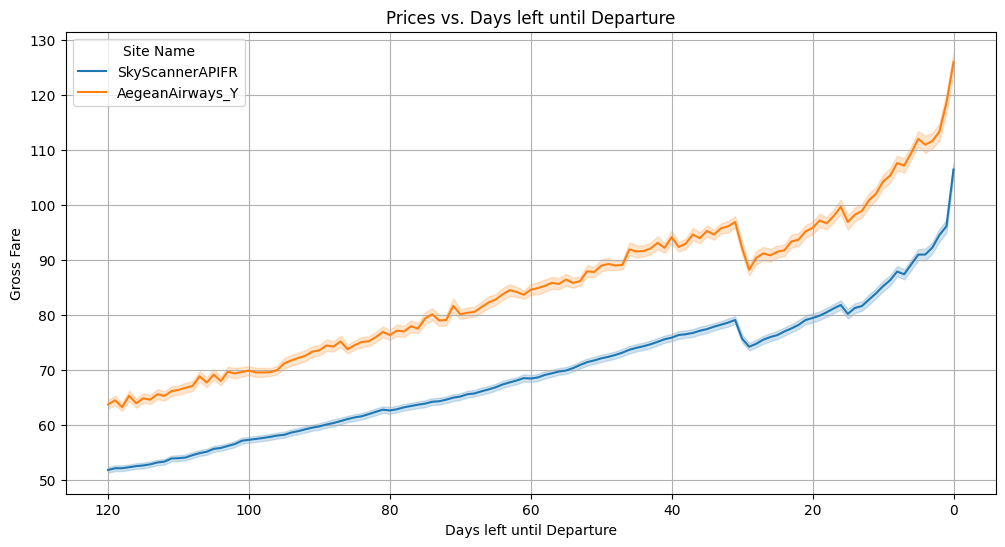

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort dataframe by 'days left' in descending order
df_sorted = merged_df_removedextreme.sort_values(by='days left', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sorted, x='days left', y='GrossFare', hue='SiteName')

plt.title('Prices vs. Days left until Departure')
plt.ylabel('Gross Fare')
plt.xlabel('Days left until Departure')
plt.legend(title='Site Name')
plt.grid(True)

# This line will reverse the x-axis to show values in descending order
plt.gca().invert_xaxis()

plt.show()


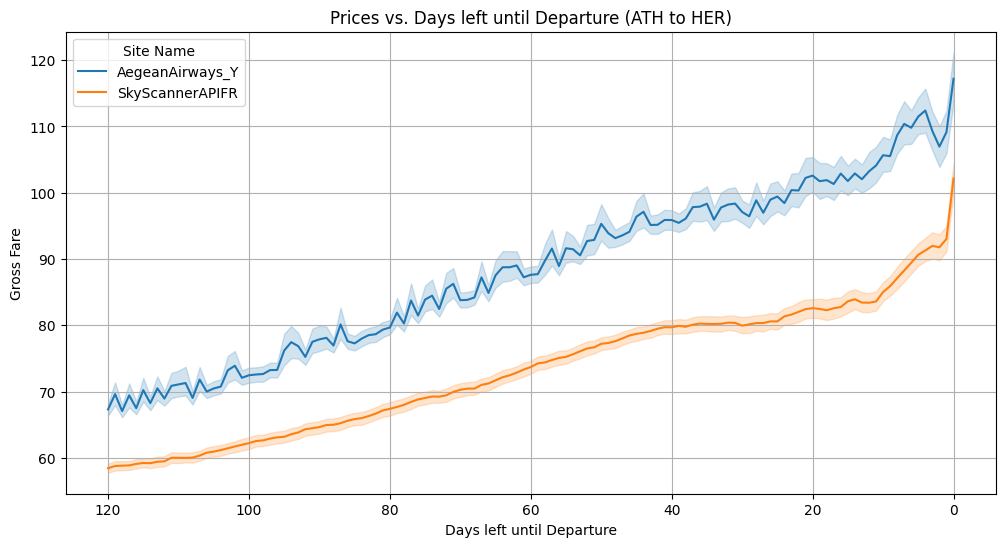

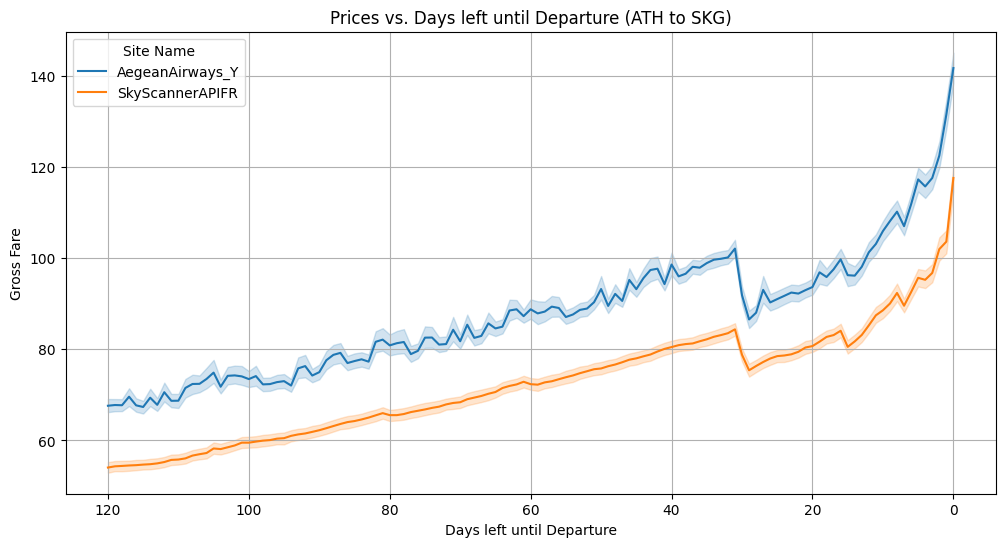

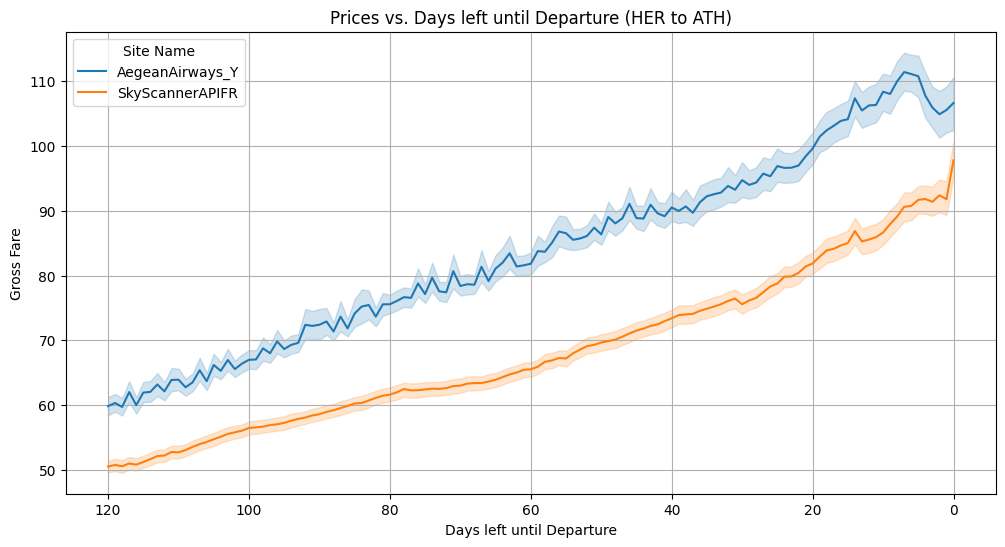

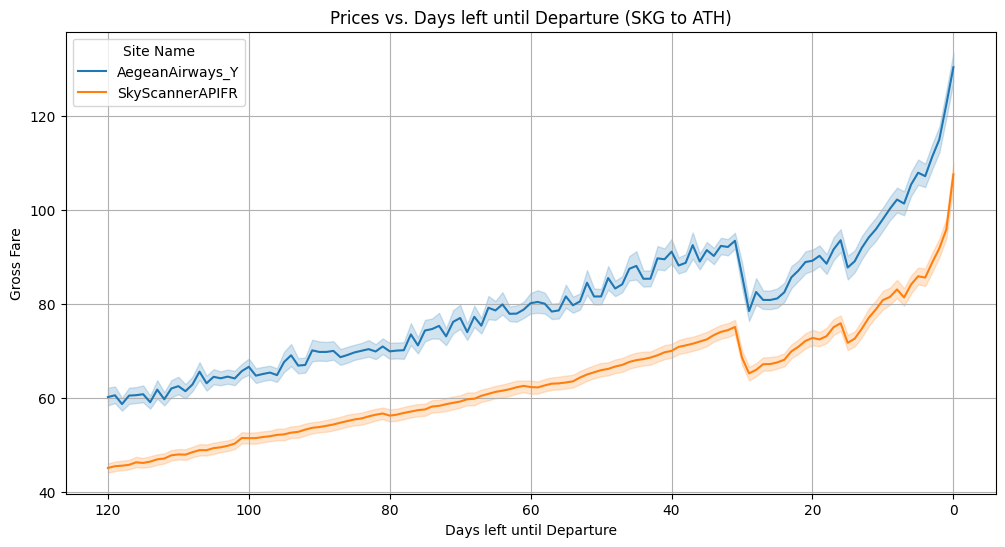

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Get unique combinations of SourceAirport and DestinationAirport
combinations = merged_df_removedextreme[['SourceAirport', 'DestinationAirport']].drop_duplicates().values

# Loop through each combination and plot
for src, dest in combinations:
    subset = merged_df_removedextreme[(merged_df_removedextreme['SourceAirport'] == src) & (merged_df_removedextreme['DestinationAirport'] == dest)]

    plt.figure(figsize=(12,6))
    sns.lineplot(data=subset, x='days left', y='GrossFare', hue='SiteName')

    plt.title(f'Prices vs. Days left until Departure ({src} to {dest})')
    plt.ylabel('Gross Fare')
    plt.xlabel('Days left until Departure')
    plt.legend(title='Site Name')
    plt.grid(True)

    # This line will reverse the x-axis to show values in descending order
    plt.gca().invert_xaxis()

    plt.show()


In [81]:
merged_df_removedextreme

,SiteName,DepartureDate,SourceAirport,DestinationAirport,Departure_Time,Arrival_Time,days left,GrossFare
0,AegeanAirways_Y,2023-08-11,ATH,HER,06:50,07:40,0,68.530
1,AegeanAirways_Y,2023-08-11,ATH,HER,10:00,10:50,0,89.455
2,AegeanAirways_Y,2023-08-11,ATH,HER,13:10,14:05,0,89.455
3,AegeanAirways_Y,2023-08-11,ATH,HER,16:25,17:20,0,102.490
4,AegeanAirways_Y,2023-08-11,ATH,HER,19:40,20:35,0,78.230
...,...,...,...,...,...,...,...,...
401561,AegeanAirways_Y,2023-09-09,SKG,ATH,14:45,15:40,120,55.770
401562,AegeanAirways_Y,2023-09-09,SKG,ATH,18:05,19:00,120,66.930
401563,AegeanAirways_Y,2023-09-09,SKG,ATH,19:45,20:40,120,66.930
401564,AegeanAirways_Y,2023-09-09,SKG,ATH,21:30,22:25,120,55.770


<ipython-input-88-2f314120656f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_removedextreme['DepartureDate'] = pd.to_datetime(merged_df_removedextreme['DepartureDate'], format='%m/%d/%Y')


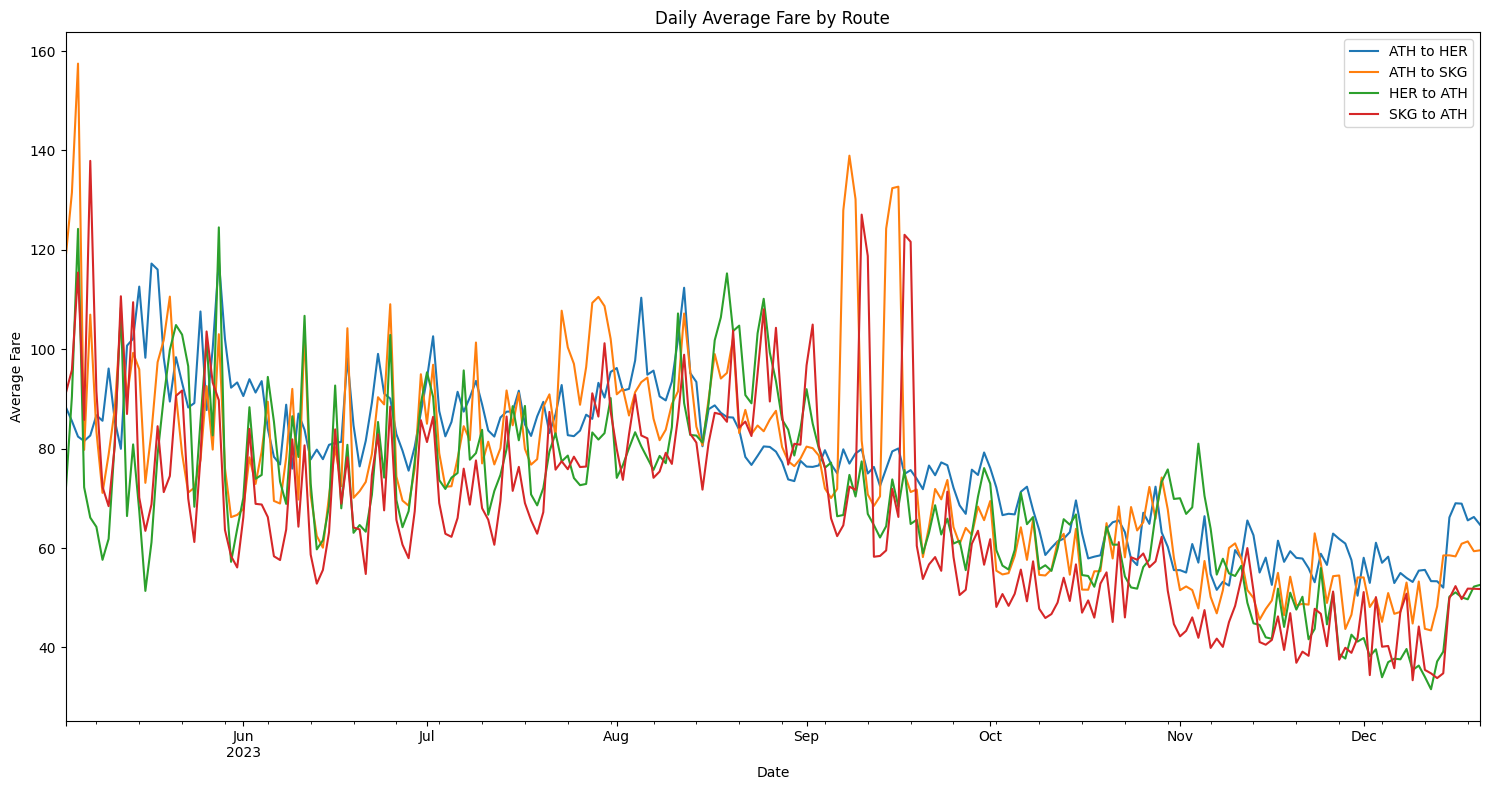

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df_removedextreme['DepartureDate'] = pd.to_datetime(merged_df_removedextreme['DepartureDate'], format='%m/%d/%Y')

plt.figure(figsize=(15, 8))

for (src, dest), group in df.groupby(['SourceAirport', 'DestinationAirport']):
    daily_avg_fare = group.groupby('DepartureDate').GrossFare.mean()
    daily_avg_fare.plot(label=f'{src} to {dest}')

plt.legend()
plt.title('Daily Average Fare by Route')
plt.ylabel('Average Fare')
plt.xlabel('Date')
#plt.xticks(rotation=45)




plt.tight_layout()
plt.show()


<ipython-input-91-c036905bca4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_removedextreme['DepartureDate'] = pd.to_datetime(merged_df_removedextreme['DepartureDate'], format='%m/%d/%Y')


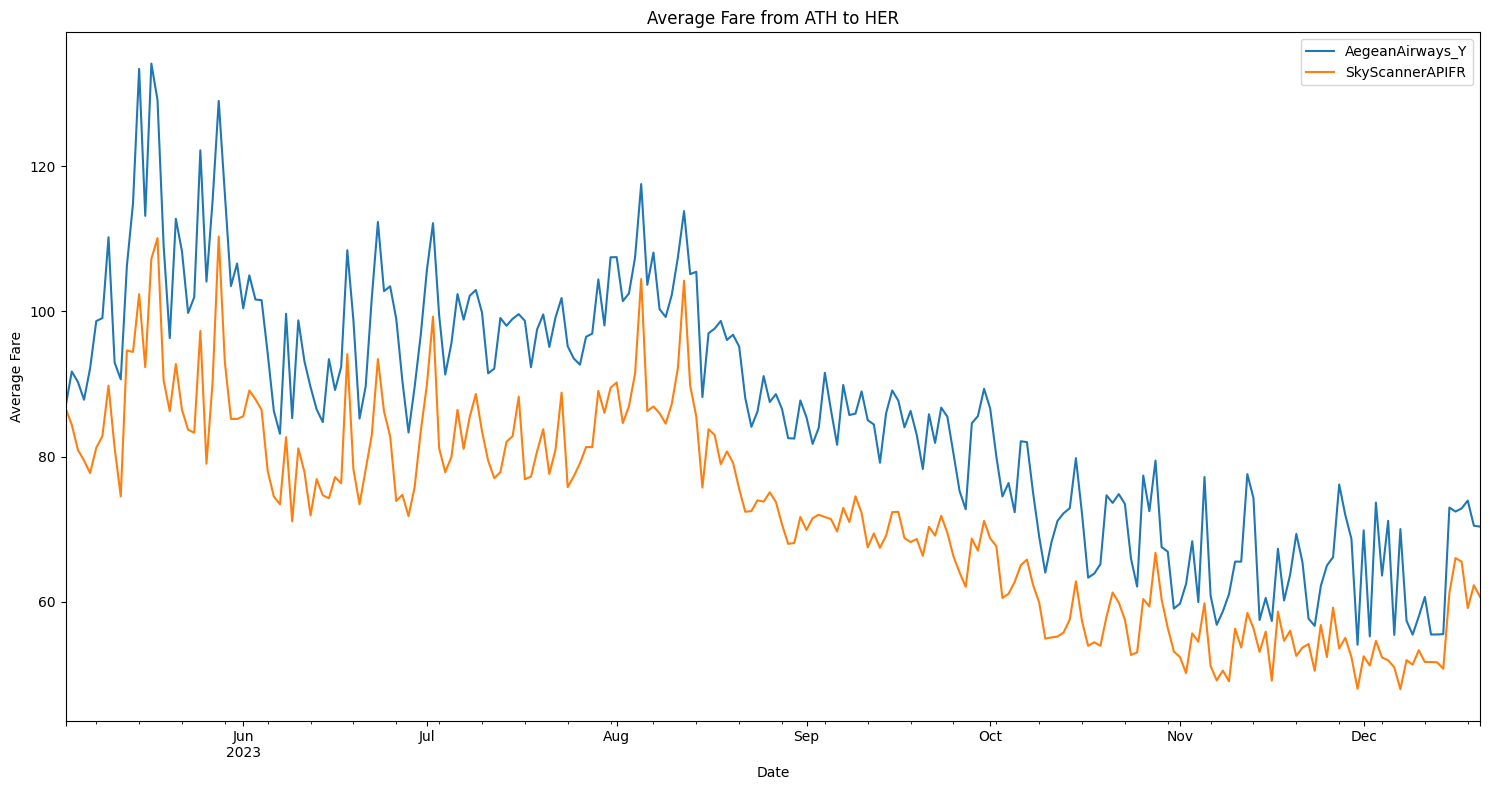

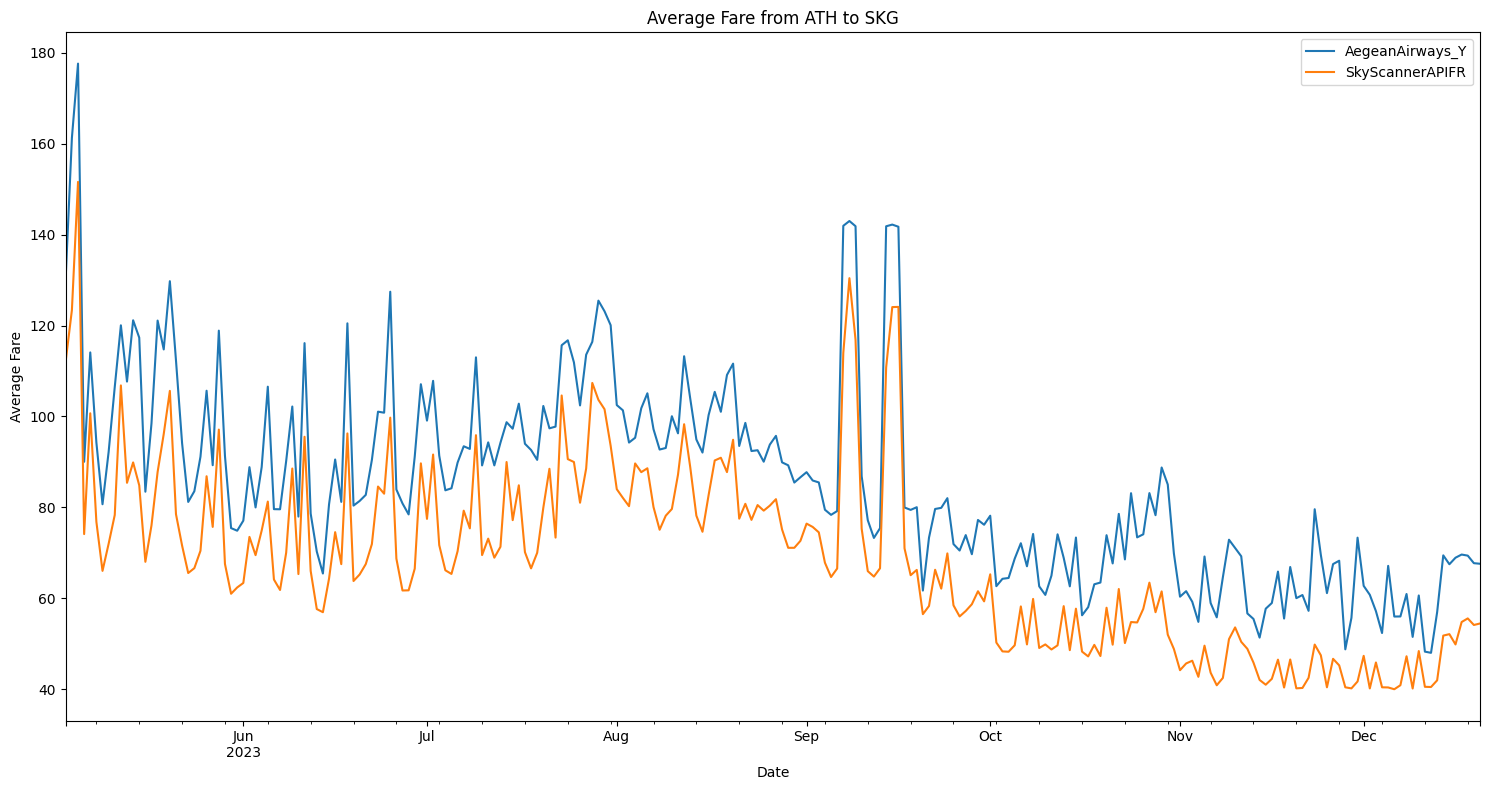

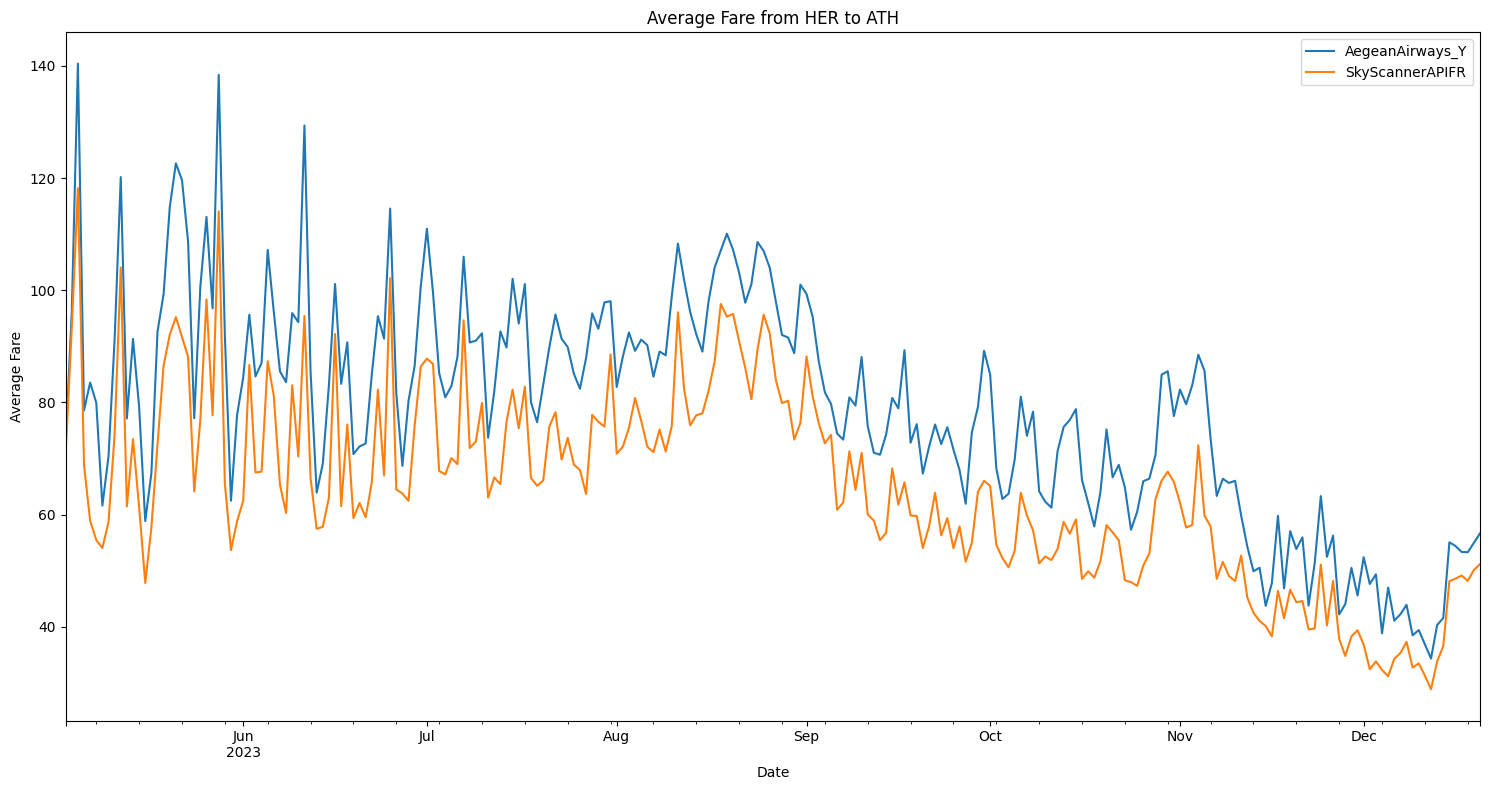

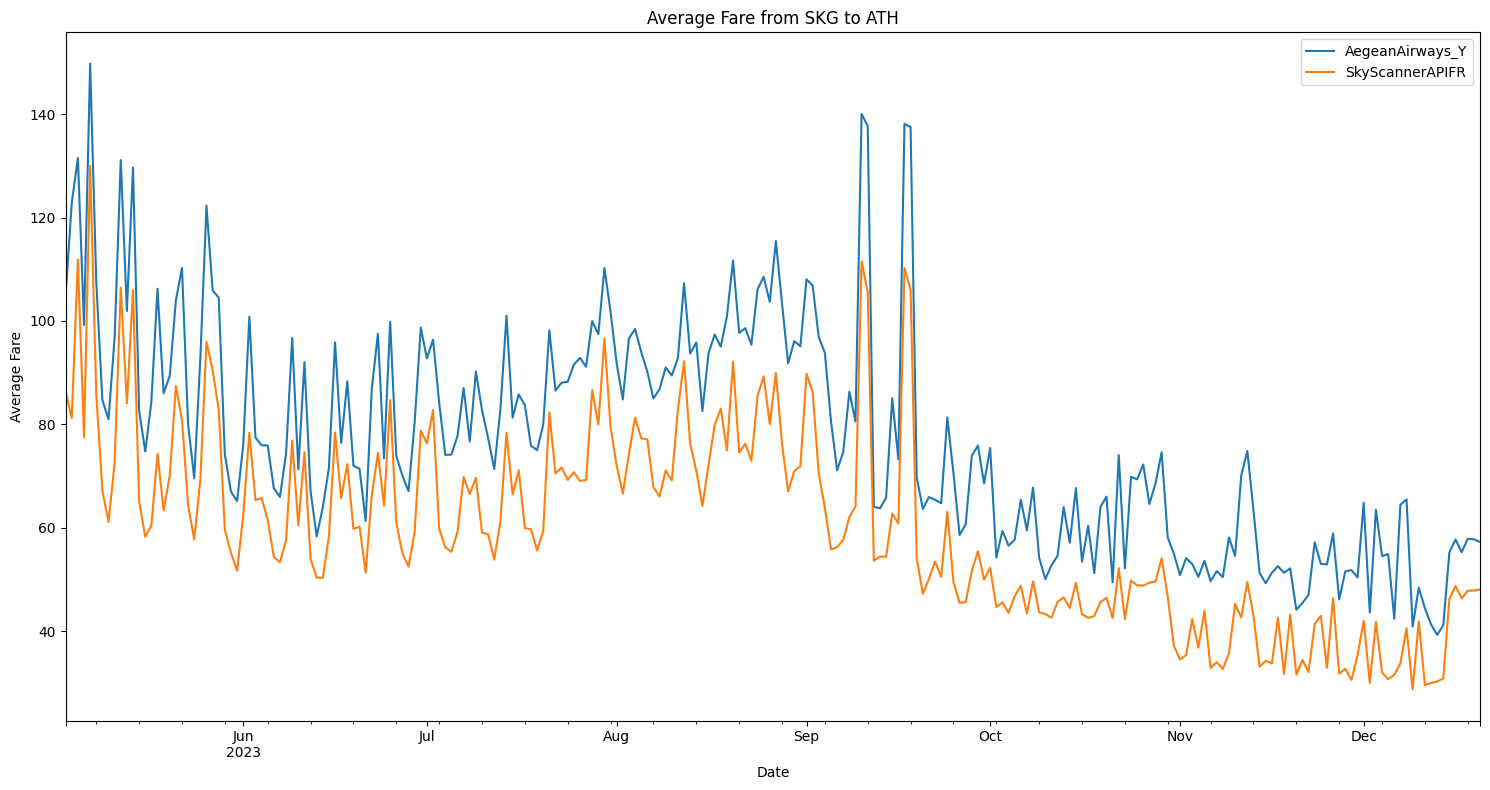

In [91]:

import matplotlib.pyplot as plt

# Convert the 'DepartureDate' column to datetime type
merged_df_removedextreme['DepartureDate'] = pd.to_datetime(merged_df_removedextreme['DepartureDate'], format='%m/%d/%Y')

# Unique routes
routes = df.groupby(['SourceAirport', 'DestinationAirport']).size().index

# For each route, plot the daily average GrossFare for each Outbound_Airline_Code
for src, dest in routes:
    route_df = merged_df_removedextreme[(merged_df_removedextreme['SourceAirport'] == src) & (merged_df_removedextreme['DestinationAirport'] == dest)]

    plt.figure(figsize=(15, 8))

    for airline in route_df['SiteName'].unique():
        airline_df = route_df[route_df['SiteName'] == airline]
        daily_avg_fare = airline_df.groupby('DepartureDate').GrossFare.mean()

        # Check if the dataframe is not empty
        if not daily_avg_fare.empty:
            daily_avg_fare.plot(label=airline)

    plt.title(f'Average Fare from {src} to {dest}')
    plt.ylabel('Average Fare')
    plt.xlabel('Date')
    plt.legend()
    plt.tight_layout()
    plt.show()
